# IMDB data analysis- Part 9- Analysis of Box Office and IMDB data- cont'd:

## This is the 3rd and final part of the box office and IMDB data analysis, and the final notebook overall in this project. 

# Overview of research questions adressed in this notebook:

# Research questions: 1.) Are average IMDB ratings, number of IMDB ratings, or metascore ratings associated with higher box office earnings, among these top box office earners?  

# 2.) What are the average IMDB ratings, number of IMDB ratings, and metascore ratings for each movie studio? Have these correlations changed over time?

# 3.)  Are any particular movie studios performing better than others in any of these metrics? Are these differences in box office earnings statistically significant?

# Overview of Part 9:

## This final part of the box office and IMDB dataset  statistical methods will include simple (i.e., univariate) as well as multivariate OLS regression models. This way, one can not only determine the degree of correlation between 2 or more variables, but specific magnitudes can be estimated, as well as weighted correlations between a given outcome/dependent variable (e.g., inflation-adjusted box office earnings) and various covariates/indepedent variables, such as metascores, IMDB ratings, and the number of IMDB ratings. 

## To answer some of the more nuanced questions, such as whether some movie studios earned a statistically signficant different level of box office revenue, I will also estimate indicator varables for each of the movie studio variables. These indicator variables will then be  used to estimate several additional OLS models, which can be used to compare various movie studios with a particular reference group (one at a time), which can show whether the movie studios had signficantly different box office earnings relative to a specific movie studio (e.g., Sony Pictures). 

# Import the revised box office/IMDB datasetwith no box office revenue outliers

In [2]:
import pandas as pd
import seaborn as sns

imdb_box_office = pd.read_csv('imdb_box_office_merged_metascores.csv')

imdb_box_office.head(10)

,Unnamed: 0,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year_x,year_y,length,genre,imdb_rating,n_votes,metascore
0,19,23,Fantasia,Disney,749882600,76408097,1941,1940,125,Animation,7.8,80637,96
1,20,24,Jurassic World,Universal,713814300,652270625,2015,2015,124,Action,7.0,526118,59
2,21,25,The Godfather,Paramount,712670800,134966411,1972,1972,175,Crime,9.2,1400345,100
3,22,26,Forrest Gump,Paramount,709890100,330252182,1994,1994,142,Drama,8.8,1560561,82
4,23,27,Mary Poppins,Disney,705981800,102272727,1964,1964,139,Comedy,7.8,136005,88
5,25,28,Grease,Paramount,696200000,189969103,1978,1978,110,Musical,7.2,203736,70
6,26,31,Thunderball,Universal_Artists,675444000,63595658,1965,1965,130,Action,7.0,93506,64
7,27,32,The Dark Knight,Warner_Bros,672789500,535234033,2008,2008,152,Action,9.0,2009298,84
8,28,33,The Jungle Book,Disney,665329600,141843612,1967,1967,78,Animation,7.6,147287,65
9,30,34,Sleeping Beauty,Disney,656264800,51600000,1959,1959,75,Animation,7.3,119347,85


# Data visualizations: correlation between Adjusted Gross and # of IMDB votes; and trends of data over time:

# Scatter plot: Correlation between Adjusted Gross and # of IMDB votes

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


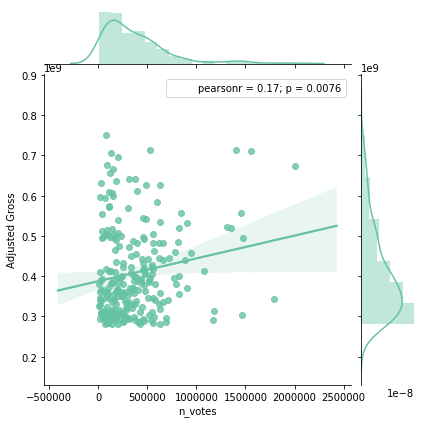

In [242]:
#implement jointplot of IMDB rating and Adjusted Gross:
plot = sns.jointplot(x='n_votes', y='Adjusted Gross', data = imdb_box_office, kind = 'reg')

plot.annotate(stats.pearsonr)

## Similar to the earlier plot, the nunber of IMDB votes shows, at most, a very modest and low positive correlation with Adjusted Gross box office earnings. 

## This is somewhat surprising since one would assume that there would be more potential fans of films that have earned higher box office revenues (inflation-adjusted) since higher box office revenues indicate that a larger number of individuals watched a particular film. 

# Trends of data over time:

# Lineplot of IMDB ratings over time

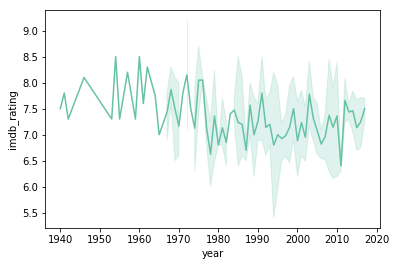

In [240]:
#lineplot of average IMDB ratings over time
sns.lineplot(x='year', y='imdb_rating', data=imdb_box_office)

# Lineplot of metascores over time

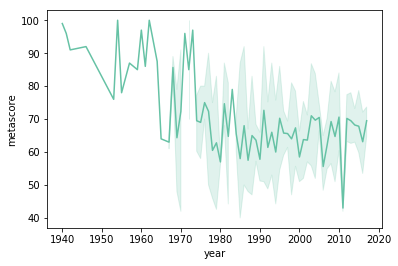

In [243]:
#lineplot of average metascore ratings over time
sns.lineplot('year', 'metascore', data=imdb_box_office)

# Lineplot of film length over time

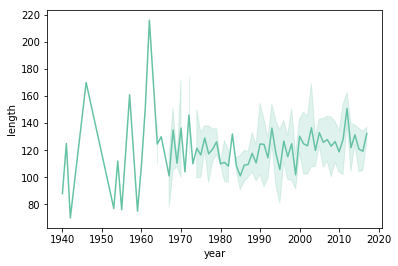

In [244]:
#average film length over time
sns.lineplot('year', 'length', data=imdb_box_office)

## Overall, eliminating the outliers changes the interpretations of the data over time moderately at most. 

## For instance, IMDB ratings fluctuate a bit less now that the outliers were deleted. More specifically, while IMDB ratings were highest overall for several years in the 1940s, 1950s, and 1960s, average IMDB ratings have not changed drastically in more recent decades, but films in the late 1970s to early 1990s generally seem to be an era with lower-quality films. 

## By contrast with the IMDB ratings, average Metascore ratings show a much more obvious and substantial decline in average ratings. For example, films in the 1990s to the present have averaged around the high-to-mid 60s. The highest-grossing films from earlier decades, such as the 1930s to early 1960s had average metascores of a solid 15-20+ points higher! Therefore, more popular films in recent decades have been perceived by critics to be of a lower overall quality, more so than that of the general movie-going public (at least, as shown by IMDB ratings). 

## Film length for the highest-grossing films, a bit like that of the original IMDB datasets, seems to have increased in the 1970s, remaining fairly steady through the present.

# Implement univariate OLS: IMDB rating and Adjusted Gross:

# The statsmodels library will be imported for estimating regression models.

## OLS simple linear regression of IMDB rating on Adjusted Gross box office revenue:

In [24]:
#import statsmodels library for linear regression model analysis
import statsmodels.api as sm

#define the dependent/outcome variable for 1st model
#1st regression model will be a linear regression model with IMDB ratings as the single covariate
Y1 = imdb_box_office['Adjusted Gross']

#define the single covariate for this model as a vector X
X1 = imdb_box_office['imdb_rating']

#add constant term by calling upon the statsmodels library
X1 = sm.add_constant(X1)

#apply ordinary least squares (OLS) estimation to this model
model1 = sm.OLS(Y1,X1)

#derive the simple linear regression (OLS) models' results
#Use heteroksedasticity robust standard errors to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased by enssuring the variance is constant (i.e., homoskedastic)
res1 = model1.fit(cov_type='HC3')

#print/display the entire regression results/output
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Gross   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     27.58
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           3.38e-07
Time:                        11:57:10   Log-Likelihood:                -4692.0
No. Observations:                 236   AIC:                             9388.
Df Residuals:                     234   BIC:                             9395.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.056e+08   5.57e+07      1.896      

# Analysis/interpretation of univariate OLS model results:

## Given the moderate degree of positive correlation seen in the earlier plots, it's not especially surprising to see that imdb_rating has a highly signififcant correlation with Adjusted Gross. I.e., notice the Z-stat is quite a bit higher than even 2.576 in absolute value. Thus, the IMBD ratings have a highly significant degree of correlation (signficant well within the 0.001 level) with Adjusted Gross income.

## However, degrees of statistical significance will never paint the full picture. For example, magnitudes of the correlaiton/association are also important to consider.

## The coefficient on IMDB ratings suggests that a 1-standard deviation increase in the IMDB ratings (i.e., an increase in ~ 0.789) will result in a $32,924,970 increase in expected Adjusted Gross box office earnings. 

## While this may seem like a large increase, $32,924,970 is equivalent to 30% of a 1 standard deviation increase in Adjusted Gross box office earnings. In other words, 32,924,970  is not small or insubstantial, but it's not a massive increase in earnings. Overall, it would appear that films with higher average box office earnings tend to have moderately higher IMDB ratings, implying that films that do better at the box office do tend to be judged as being of a moderately higher degree of quality. The R-squared coefficient of 9%, however, does further demonstrate the limited degree to which higher IMDB ratings are associated with higher box office earnings. I.e., the relationship between the 2 variables is not particularly substantial.

## Let's estimate a more rigorous model by incorporating the number of IMDB ratings as well as metascore ratings into another OLS model.

# OLS multivariate model of IMDB rating, metascore, and n_votes on Adjusted Gross:

In [36]:
import numpy as np
#import statsmodels library for linear regression model analysis
import statsmodels.api as sm

#define the dependent/outcome variable for 1st model
#1st regression model will be a linear regression model with IMDB ratings as the single covariate
Y2 = imdb_box_office['Adjusted Gross']

#define the single covariate for this model
X2 = imdb_box_office[['imdb_rating', 'metascore', 'n_votes']]

#add constant term by calling upon the statsmodels library
X2 = sm.add_constant(X2)

#apply ordinary least squares (OLS) estimation to this model
#And derive the linear regression (OLS) models' results
#Use heteroksedasticity robust standard errors to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased
model2 = sm.OLS(Y2,X2).fit(cov_type='HC3')

#print/display the entire regression results/output
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Gross   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     10.62
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           1.44e-06
Time:                        12:25:35   Log-Likelihood:                -4689.7
No. Observations:                 236   AIC:                             9387.
Df Residuals:                     232   BIC:                             9401.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.813e+08   6.61e+07      2.743      

# Analysis/interpretation of multivariate OLS model (model2):

## At first glance, it may seem strange that each of the 3 variables are statistically insignificant. However, the regression output does state a warning that the "condition number is large". This and the lack of signficance of variables that clearly have some degree of signifcant correlation with Adjusted Gross (e.g., consider IMDB ratings from the earlier, simple linear, OLS regression model) are both classic indications of multicollienarity. 

## Mutlicollinearity results when 2 or more covariates are substantially correlated with each other, which can result in substantially biased estimates of the covariates' coefficients as well as biased estimates of Standard errors. In other words, multicollinearity can make the accuracy, precision, and calrity of a regression model extremely unreliable or even downright incorrect.

## Mutlicollinearity can be examined by calculting the variance inflaiton factor (VIF), a measure of the degree of correlation among each covariate. For the variables that have an especially high VIF, we can then ommit them from the model, and re-run the OLS model. 

## Calculate the VIF of the multivariate OLS model, and drop the "offending" variable(s)

In [37]:
#import pandas library to call upon the Series method
import pandas as pd

#import the VIF module from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor


#calculate the VIF for X2 (i.e., the covariates from the multivariate OLS model):
pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])],
          index=X2.columns)

const          142.934768
imdb_rating      3.355447
metascore        2.396788
n_votes          1.647751
dtype: float64

## Surprisingly, none of the variables has a particularly high VIF, but the intercept/constant of the VIF is exceptionally high, indicating that the overall degree of multicollinearity among the 3 covariates is quite high.

## Given that imdb_rating has the highest VIF, let's ommit that, and then re-estimate a multivariate OLS model, and then re-estimate the VIF.

# Re-run multivariate OLS model, excluding imdb_rating due to high VIF:

In [64]:
import numpy as np
#import statsmodels library for linear regression model analysis
import statsmodels.api as sm

#define the dependent/outcome variable for 1st model
#1st regression model will be a linear regression model with IMDB ratings as the single covariate
Y3 = imdb_box_office['Adjusted Gross']

#define the single covariate for this model
X3 = imdb_box_office[['metascore', 'n_votes']]

#add constant term by calling upon the statsmodels library
X3 = sm.add_constant(X3)

#apply ordinary least squares (OLS) estimation to this model
#And derive the linear regression (OLS) models' results
#Use heteroksedasticity robust standard errors to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased
model3 = sm.OLS(Y3,X3).fit(cov_type='HC3')

#print/display the entire regression results/output
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Gross   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     12.72
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           5.72e-06
Time:                        13:58:48   Log-Likelihood:                -4690.4
No. Observations:                 236   AIC:                             9387.
Df Residuals:                     233   BIC:                             9397.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.632e+08   2.87e+07      9.167      0.0

##  Implement VIF calculations for new multivariate OLS model:

In [48]:
#import pandas library to call upon the Series method
import pandas as pd

#import the VIF module from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor


#calculate the VIF for X3 (i.e., the covariates from the 2nd multivariate OLS model):
pd.Series([variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])],
          index=X3.columns)

const        19.925667
metascore     1.087016
n_votes       1.087016
dtype: float64

## This appears to be a solid improvement in reducing mutlicollinearity. Neither variable in the model has a VIF greater than 1.1 (which is well within an acceptable range), and the intercept is still high, but much lower than with all 3 covariates.

## The significance of metascores has now changed such that it is now considered highly statistically significant (very easily within a 0.01% level of significance), while n_votes still remains statistically insignificant. The overall model has an F-statistic of 12.72, which makes the overall OLS model signficant at even the 0.01% level, even though n_votes is individually insignificant. 

## The magnitude of metascores is lower than that of IMDB ratings from the original univariate OLS model, but this may in part be due to some remaining multicollinearity. 

## While there may be an even higher VIF, let's estimate another multivariate OLS, which will exclude n_votes, but re-include imdb_rating.

## Model 4: imdb_rating and metascore

In [47]:
import numpy as np
#import statsmodels library for linear regression model analysis
import statsmodels.api as sm

#define the dependent/outcome variable for 1st model
#1st regression model will be a linear regression model with IMDB ratings as the single covariate
Y4 = imdb_box_office['Adjusted Gross']

#define the single covariate for this model
X4 = imdb_box_office[['metascore', 'imdb_rating']]

#add constant term by calling upon the statsmodels library
X4 = sm.add_constant(X4)

#apply ordinary least squares (OLS) estimation to this model
#And derive the linear regression (OLS) models' results
#Use heteroksedasticity robust standard errors to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased
model4 = sm.OLS(Y4,X4).fit(cov_type='HC3')

#print/display the entire regression results/output
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Gross   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     15.52
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           4.69e-07
Time:                        12:39:00   Log-Likelihood:                -4689.9
No. Observations:                 236   AIC:                             9386.
Df Residuals:                     233   BIC:                             9396.
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.572e+08   6.16e+07      2.551      

## Re-estimate VIF

In [49]:
#import pandas library to call upon the Series method
import pandas as pd

#import the VIF module from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor


#calculate the VIF for X3 (i.e., the covariates from the 2nd multivariate OLS model):
pd.Series([variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])],
          index=X4.columns)

const          99.741456
metascore       2.213578
imdb_rating     2.213578
dtype: float64

## Notice the VHF is once again quite high overall, with each variable showing a higher (but not excessively high) VHF as well.

## Due to this relatively high degree of multicollinearity, the results of this OLS model are, at best, a bit suspect. However, it does appear that metascores do have a more signficant level of association with Adjusted Gross box office earnings, even though the magnitude is a bit lower. Nevertheless, both variables are still a bit short of statistical signifcance this time, even at the 5% level.

## Summary of results:

## Overall, the regression results suggest that metascore ratings may be the most significant factor associated with higher box office earnings. Higher metscore ratings appear to lead to a moderate increase in box office revenue.

## This association between box office revenue and metascore ratings does make sense from an economic and marketing perspective as well. 

## From an economic perspective, higher metascore ratings can result in an increase in demand for tickets to movies with these higher ratings. This is because higher average movie critic ratings will encourage more people to watch a movie in theaters, thus causing a change in consumer preferences, and increasing demand for these highly-rated films.

## From a marketing perspective, these results also make sense. Namely, trailers and other advertisements for films will oftentimes reference particular movie critics' praise or ratings for the given film, and this will likely increase demand (this essentially overlaps with the economics explanation, but with a marketing-oriented perspective) for these films. Of course, higher movie critic ratings makes these marketing campaigns more credible to the average consumer, making higher-rated films all the more popular, at least on average.  

# Create indicator/binary variables for each movie studio in the dataset to be used for some quantitative analysis

## This way, we can see whether IMDB ratings or metascores play a bigger role in affecting Adjusted Gross box office revenues for different movie studios. This might be the case because some movie studios have distributed a larger number of highly successful films than others.

# Create indicators for movie studios

In [52]:
#create movie studio indicator variables
movie_studios = pd.get_dummies(imdb_box_office['Studio'])

## concatenate new variables to original dataset

In [54]:
#use concat() method to merge the movie_studios variable to the original dataframE
imdb_box_office  = pd.concat([imdb_box_office, movie_studios], axis=1)

imdb_box_office.head(10)

,Rank,name,Studio,Adjusted Gross,Unadjusted Gross,year,length,genre,imdb_rating,n_votes,...,Newmarket,Orion,Paramount,RKO,Sony,Summit_Entertainment,TriStar,Universal,WB_New_Line,Warner_Bros
0,23,Fantasia,Disney,749882600,76408097,1941,125,Animation,7.8,80637,...,0,0,0,0,0,0,0,0,0,0
1,24,Jurassic World,Universal,713814300,652270625,2015,124,Action,7.0,526118,...,0,0,0,0,0,0,0,1,0,0
2,25,The Godfather,Paramount,712670800,134966411,1972,175,Crime,9.2,1400345,...,0,0,1,0,0,0,0,0,0,0
3,26,Forrest Gump,Paramount,709890100,330252182,1994,142,Drama,8.8,1560561,...,0,0,1,0,0,0,0,0,0,0
4,27,Mary Poppins,Disney,705981800,102272727,1964,139,Comedy,7.8,136005,...,0,0,0,0,0,0,0,0,0,0
5,28,Grease,Paramount,696200000,189969103,1978,110,Musical,7.2,203736,...,0,0,1,0,0,0,0,0,0,0
6,31,Thunderball,Universal_Artists,675444000,63595658,1965,130,Action,7.0,93506,...,0,0,0,0,0,0,0,0,0,0
7,32,The Dark Knight,Warner_Bros,672789500,535234033,2008,152,Action,9.0,2009298,...,0,0,0,0,0,0,0,0,0,1
8,33,The Jungle Book,Disney,665329600,141843612,1967,78,Animation,7.6,147287,...,0,0,0,0,0,0,0,0,0,0
9,34,Sleeping Beauty,Disney,656264800,51600000,1959,75,Animation,7.3,119347,...,0,0,0,0,0,0,0,0,0,0


# re-export the new dataframe

In [55]:
imdb_box_office.to_csv('imdb_box_office_studio_indicators.csv')

# Run some additional models to see whether the correlations change when factoring in different movie studios

# Model 5: Multivariate OLS model with metascore, n_votes, and set of 20 movie studio indicators: reference group (i.e., the excluded movie studio) = Buena_Vista

In [72]:
#import statsmodels library for linear regression model analysis
import statsmodels.api as sm

#define the dependent/outcome variable for 1st model
#1st regression model will be a linear regression model with IMDB ratings as the single covariate
Y5 = imdb_box_office['Adjusted Gross']

#define the covariates for this model
X5 = imdb_box_office[[ 'metascore',  'n_votes', 'Columbia', 'Disney', 'DreamWorks', 'Fox', 'IFC', 'Lionsgate','MGM', 
                      'Newmarket', 'New_Line', 'Orion','Paramount', 'RKO', 'Summit_Entertainment', 'TriStar', 
                      'WB_New_Line', ' Universal_Artists', 'Warner_Bros', 'Universal', 'American_International', 'Sony']]

#add constant term by calling upon the statsmodels library
X5 = sm.add_constant(X5)

#apply ordinary least squares (OLS) estimation to this model
#And derive the linear regression (OLS) models' results
#Use heteroksedasticity robust standard errors to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased
model5 = sm.OLS(Y5,X5).fit(cov_type='HC3')

#print/display the entire regression results/output
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Gross   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     4.208
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           2.46e-08
Time:                        14:43:03   Log-Likelihood:                -4666.3
No. Observations:                 236   AIC:                             9379.
Df Residuals:                     213   BIC:                             9458.
Df Model:                          22                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.60

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 22, but rank is 21
  'rank is %d' % (J, J_), ValueWarning)


## Re-estimate VIF

In [73]:
#import pandas library to call upon the Series method
import pandas as pd

#import the VIF module from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor


#calculate the VIF for X5 (i.e., the covariates from the 5th multivariate OLS model):
pd.Series([variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])],
          index=X5.columns)

const                     30.206164
metascore                  1.364585
n_votes                    1.340067
Columbia                   1.241618
Disney                     1.232634
DreamWorks                 1.175506
Fox                        1.396473
IFC                        1.024931
Lionsgate                  1.080136
MGM                        1.093548
Newmarket                  1.031406
New_Line                   1.172817
Orion                      1.051913
Paramount                  1.506905
RKO                        1.085670
Summit_Entertainment       1.055509
TriStar                    1.069173
WB_New_Line                1.086123
 Universal_Artists         1.187702
Warner_Bros                1.653161
Universal                  1.484073
American_International     1.057489
Sony                       1.291530
dtype: float64

## Cummulatively, the VIF is high, but individually no single variable has an especially high VIF, with each well below 2. The high overall VIF is expected anyway because this model is running a set of inidcator variables that encompasses a very large portion of the dataset.

# Interpretation of results from Model 5:

## Interestingly, both the metascore and n_votes covariates are now statistically significant, both at the 0.01 level. 

## The adjusted-R-squared coefficient is also quite a bit higher (by about 9%) than any of the previous regression models, suggesting that adding in the movie studio indicator variables has improved the overall fit of the model in terms of Adjusted Gross box office revenues. Namely, the covariates collectively explain 19.3% of the variation in the Adjusted Gross variable. 

## Several of the coefficients on the movie studio indicator variables demonstrate that different movie studios have had significantly different levels of box office revenues. For example, relative to Buena Vista, 2 movie studios had signficantly higher box office earnings: RKO and Disney. While the magnitudes for these 2 studio variables are not massive, each of them are still larger than that of any of the other variables that managed to attain at least a 0.01% level of signficance.

## By contrast, Warner Bros New Line (WB_New_Line) showed a signficantly lower level of box office revenues. 


## The magnitude of the metascore variable is slightly smaller than in earlier models, but still fairly large. Namely, a 1-standard deviation increase in metascore ratings (i.e., ~15.6) would lead to a $21,902,400 expected increase in gross box office revenues, or roughly 20% of a 1-standard deviation increase in gross box office revenues. 

## While seemingly smaller in magnitude, a 1-standard deviation increase in the number of IMDB votes would lead to a somewhat higher higher level of box office earniings: namely, an expected $25,819,078 increase in box office earnings.

# Model 6: Multivariate OLS model with metascore, n_votes, and set of 20 movie studio indicators: reference group  = Sony

In [82]:
#import statsmodels library for linear regression model analysis
import statsmodels.api as sm

#define the dependent/outcome variable for 1st model
#1st regression model will be a linear regression model with IMDB ratings as the single covariate
Y6 = imdb_box_office['Adjusted Gross']

#define the covariates for this model
X6 = imdb_box_office[[ 'metascore', 'n_votes', 'Columbia', 'Disney', 'DreamWorks', 'Fox', 'IFC', 'Lionsgate','MGM', 
                      'Newmarket', 'New_Line', 'Orion','Paramount', 'RKO', 'Summit_Entertainment', 'TriStar', 
                      'WB_New_Line', ' Universal_Artists', 'Warner_Bros', 'Universal', 'American_International', 'Buena_Vista']]

#add constant term by calling upon the statsmodels library
X6 = sm.add_constant(X6)

#apply ordinary least squares (OLS) estimation to this model
#And derive the linear regression (OLS) models' results
#Use heteroksedasticity robust standard errors to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased
model6 = sm.OLS(Y6,X6).fit(cov_type='HC3')

#print/display the entire regression results/output
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Gross   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     4.208
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           2.45e-08
Time:                        14:56:40   Log-Likelihood:                -4666.3
No. Observations:                 236   AIC:                             9379.
Df Residuals:                     213   BIC:                             9458.
Df Model:                          22                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.54

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 22, but rank is 21
  'rank is %d' % (J, J_), ValueWarning)


# Interpretation of Model 6:

## Just like Model 5, both metascore and n_votes are highly signficant. This is expected since the only difference is the reference group; essentially the same variables are being run, with the only main differences being the magnitudes of the indicator variables and the intercept term.

## Relative to Sony, Disney and RKO still outperformed it on the basis of gross box office revenue. Warner Bros New Line also once again lagged signficantly behind the curve, with a signficantly lower level of box office revenues.

# Model 7: Multivariate OLS model with metascore, n_votes, and set of 20 movie studio indicators: reference group = MGM

In [84]:
#import statsmodels library for linear regression model analysis
import statsmodels.api as sm

#define the dependent/outcome variable for 1st model
#1st regression model will be a linear regression model with IMDB ratings as the single covariate
Y7 = imdb_box_office['Adjusted Gross']

#define the covariates for this model
X7 = imdb_box_office[[ 'metascore',  'n_votes', 'Columbia', 'Disney', 'DreamWorks', 'Fox', 'IFC', 'Lionsgate','Sony', 
                      'Newmarket', 'New_Line', 'Orion','Paramount', 'RKO', 'Summit_Entertainment', 'TriStar', 
                      'WB_New_Line', ' Universal_Artists', 'Warner_Bros', 'Universal', 'American_International', 'Buena_Vista']]

#add constant term by calling upon the statsmodels library
X7 = sm.add_constant(X7)

#apply ordinary least squares (OLS) estimation to this model
#And derive the linear regression (OLS) models' results
#Use heteroksedasticity robust standard errors to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased
model7 = sm.OLS(Y7,X7).fit(cov_type='HC3')

#print/display the entire regression results/output
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Gross   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     4.208
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           2.46e-08
Time:                        14:57:22   Log-Likelihood:                -4666.3
No. Observations:                 236   AIC:                             9379.
Df Residuals:                     213   BIC:                             9458.
Df Model:                          22                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.50

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 22, but rank is 21
  'rank is %d' % (J, J_), ValueWarning)


# Interpretation of Model 7:

## Relative to MGM, only Disney managed to solidly outperform it in terms of gross box office revenue.  Interestingly, however, none of the studios showed a signficnatly lower level of box office earnings, so MGM apparently has gained box office earnings at this highest tier quite similarly to that of most movie studios, on average. 

# Model 8: Multivariate OLS model with metascore, n_votes, and set of 20 movie studio indicators: reference group = Disney

In [87]:
#import statsmodels library for linear regression model analysis
import statsmodels.api as sm

#define the dependent/outcome variable for 1st model
#1st regression model will be a linear regression model with IMDB ratings as the single covariate
Y8 = imdb_box_office['Adjusted Gross']

#define the covariates for this model
X8 = imdb_box_office[[ 'metascore',  'n_votes', 'Columbia', 'MGM', 'DreamWorks', 'Fox', 'IFC', 'Lionsgate','Sony', 
                      'Newmarket', 'New_Line', 'Orion','Paramount', 'RKO', 'Summit_Entertainment', 'TriStar', 
                      'WB_New_Line', ' Universal_Artists', 'Warner_Bros', 'Universal', 'American_International', 'Buena_Vista']]

#add constant term by calling upon the statsmodels library
X8 = sm.add_constant(X8)

#apply ordinary least squares (OLS) estimation to this model
#And derive the linear regression (OLS) models' results
#Use heteroksedasticity robust standard errors to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased
model8 = sm.OLS(Y8,X8).fit(cov_type='HC3')

#print/display the entire regression results/output
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:         Adjusted Gross   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     4.212
Date:                Tue, 05 Feb 2019   Prob (F-statistic):           2.40e-08
Time:                        15:36:49   Log-Likelihood:                -4666.3
No. Observations:                 236   AIC:                             9379.
Df Residuals:                     213   BIC:                             9458.
Df Model:                          22                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    4.5

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 22, but rank is 21
  'rank is %d' % (J, J_), ValueWarning)


# Interpretation of Model 8:

## Relative to Disney, a very large portion of the other movie studios have signficantly lower levels of box office earnings within this highest tier of box office earners. 

## Only American International, RKO, Newmarket, and IFC gained gross box office earnings that were not signifcantly different from Disney at the 0.05 level. Judged by a more conservative standard, Universal Artists did not earn less gross box office revenue than Disney at the 0.01 level, but did earn signficantly less at the 0.05 level.

# Discussion of overall regression results, statistics, and plots:

## Overall, metascores and the number of IMDB votes, appear to play a somewhat significant factor in affecting gross box office revenues. IMDB ratings themselves do not appear to have a signficant impact, but do have a moderate positive correlation with gross box office earnings. While these effects are not very large in magnitude, the plots, summary statistics, and regression models' results suggest that higher metascore ratings as well as a higher number of IMDB votes will both lead to higher gross box office earnings. However, other factors appear to play a fairly large role. For example, Model 4 shows that the number of IMDB votes and metascores collectively only explain about 10% of the variation in gross box office earnings. Therefore, other factors must exist that explain the other ~90% of the variation in the data.

## Part of this variaiton is clearly explained by differences in box office earnings for different movie studios. As the summary statistics and OLS Models 5-8 strongly suggested, there are statistically different levels of gross box office earnings for some of the movie studios (which are also mdoerately large in magnitude). For example, Disney in particular tended to earn signficantly higher gross box office revenues than all but 20% of the other movie studios in this dataset.